## 1. Targeting treatment for heart disease patients
<p>There are many industries where understanding how things group together is beneficial. For example, retailers want to understand the similarities among their customers to direct advertisement campaigns, and botanists classify plants based on their shared similar characteristics. One way to group objects is to use clustering algorithms. We are going to explore the usefulness of unsupervised clustering algorithms to help doctors understand which treatments might work with their patients.</p>
<p><img src="https://assets.datacamp.com/production/project_552/img/images-3.jpeg" alt></p>
<p>We are going to cluster anonymized data of patients who have been diagnosed with heart disease. Patients with similar characteristics might respond to the same treatments, and doctors could benefit from learning about the treatment outcomes of patients like those they are treating. The data we are analyzing comes from the V.A. Medical Center in Long Beach, CA. To download the data, visit <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease">here</a>. </p>
<p>Before running any analysis, it is essential to get an idea of what the data look like. The clustering algorithms we will use require numeric data&mdash;we'll check that all the data are numeric. In this project, you will be brushing up on your base R skills. Let's go!</p>

In [154]:
# Load the data
heart_disease <- read.csv('datasets/heart_disease_patients.csv')

# Print the first ten rows
head(heart_disease)

id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3
2,67,1,4,160,286,0,2,108,1,1.5,2
3,67,1,4,120,229,0,2,129,1,2.6,2
4,37,1,3,130,250,0,0,187,0,3.5,3
5,41,0,2,130,204,0,2,172,0,1.4,1
6,56,1,2,120,236,0,0,178,0,0.8,1


## 2. Quantifying patient differences
<p>It is important to conduct some exploratory data analysis (EDA) to familiarize ourselves with the data before clustering. EDA will help us learn more about the variables and make an informed decision about whether we should scale the data. Because k-means and hierarchical clustering measure similarity between points using a distance formula, it can place extra emphasis on certain variables that have a larger scale and thus larger differences between points.</p>
<p>Exploratory data analysis helps us to understand the characteristics of the patients in the data. We need to get an idea of the value ranges of the variables and their distributions. This will also be helpful when we evaluate the clusters of patients from the algorithms. Are there more patients of one gender? What might an outlier look like?</p>

In [156]:
# Evidence that the data should be scaled?
summary(heart_disease)
# Remove id
heart_disease <- heart_disease[ , !(names(heart_disease) %in% c('id'))]

# Scaling data and saving as a data frame
scaled<-scale(heart_disease)
# What do the data look like now?
summary(scaled)

       id             age             sex               cp       
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000  
 Median :152.0   Median :56.00   Median :1.0000   Median :3.000  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :3.158  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :4.000  
    trestbps          chol            fbs            restecg      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000   Max.   :2.0000  
    thalach          exang           oldpeak         slope      
 Min

      age               sex                cp             trestbps       
 Min.   :-2.8145   Min.   :-1.4549   Min.   :-2.2481   Min.   :-2.14149  
 1st Qu.:-0.7124   1st Qu.:-1.4549   1st Qu.:-0.1650   1st Qu.:-0.66420  
 Median : 0.1727   Median : 0.6851   Median :-0.1650   Median :-0.09601  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7259   3rd Qu.: 0.6851   3rd Qu.: 0.8765   3rd Qu.: 0.47218  
 Max.   : 2.4961   Max.   : 0.6851   Max.   : 0.8765   Max.   : 3.88132  
      chol              fbs             restecg             thalach       
 Min.   :-2.3310   Min.   :-0.4169   Min.   :-0.995103   Min.   :-3.4364  
 1st Qu.:-0.6894   1st Qu.:-0.4169   1st Qu.:-0.995103   1st Qu.:-0.7041  
 Median :-0.1100   Median :-0.4169   Median : 0.009951   Median : 0.1483  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 0.5467   3rd Qu.:-0.4169   3rd Qu.: 1.015005   3rd Qu.: 0.7166  
 Max.   : 6.1283   Max.   : 2.39

## 3. Let's start grouping patients
<p>Now that we have scaled the data, we can start the clustering process. For the k-means algorithm, it is necessary to select the number of clusters in advance.</p>
<p>It is also important to make sure that our results are reproducible when conducting a statistical analysis. This means that when someone runs our code on the same data, they will get the same results. Because we are doing an analysis that has a random aspect, it is necessary to set a seed to ensure reproducibility.</p>
<p>Reproducibility is especially important because doctors will potentially use our results to treat patients. It is vital that other analysts see where the groups come from and can verify the results. </p>

In [158]:
# Set the seed so that results are reproducible
seed_val  <- 10
set.seed(seed_val)

# Select a number of clusters
k=5
# Run the k-means algorithm
first_clust = kmeans(scaled,centers=k,nstart=1)

# How many patients are in each cluster?
first_clust$size

[1] 24 53 87 72 67

## 4. Another round of k-means
<p>Because the k-means algorithm initially selects the cluster centers by randomly selecting points, different iterations of the algorithm can result in different clusters. If the algorithm is genuinely grouping similar observations (as opposed to clustering noise), then cluster assignments will be somewhat robust between various iterations of the algorithm. </p>
<p>With regards to the heart disease data, this would mean that the same patients would be grouped even when the algorithm is initialized at different random points. If patients are not in similar clusters with various algorithm runs, then the clustering method is not picking up on meaningful relationships between patients. </p>
<p>We're going to explore how the patients are grouped with another iteration of the k-means algorithm. We will then be able to compare the resulting groups of patients. </p>

In [160]:
# Set the seed
seed_val <- 38
set.seed(seed_val)

# Select a number of clusters and run the k-means algorithm
k=5
second_clust = kmeans(scaled,centers=k,nstart=1)

# How many patients are in each cluster?
second_clust$size

[1] 51 48 42 67 95

## 5. Comparing patient clusters
<p>It is important that the clusters are stable. Even though the algorithm begins by randomly initializing the cluster centers, if the k-means algorithm is the right choice for the data, then different initializations of the algorithm will result in similar clusters.</p>
<p>The clusters from different iterations may not be the same, but the clusters should be roughly the same size and have similar distributions of variables. If there is a lot of change in clusters between different iterations of the algorithm, then k-means clustering is not the right choice for the data. </p>
<p>It is not possible to validate that the clusters obtained from the algorithm are accurate because there is no patient labeling. Thus, it is necessary to examine how the clusters change between different iterations of the algorithm. We're going to use some visualizations to get an idea of the cluster stabilities. That way we can see how certain patient characteristics may have been used to group patients together.</p>

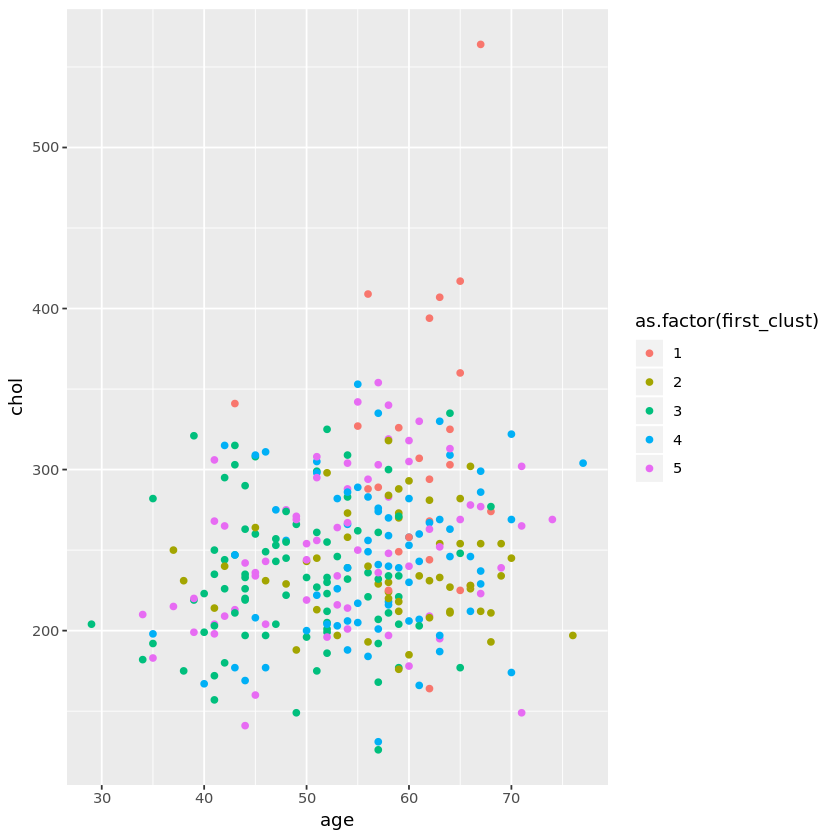

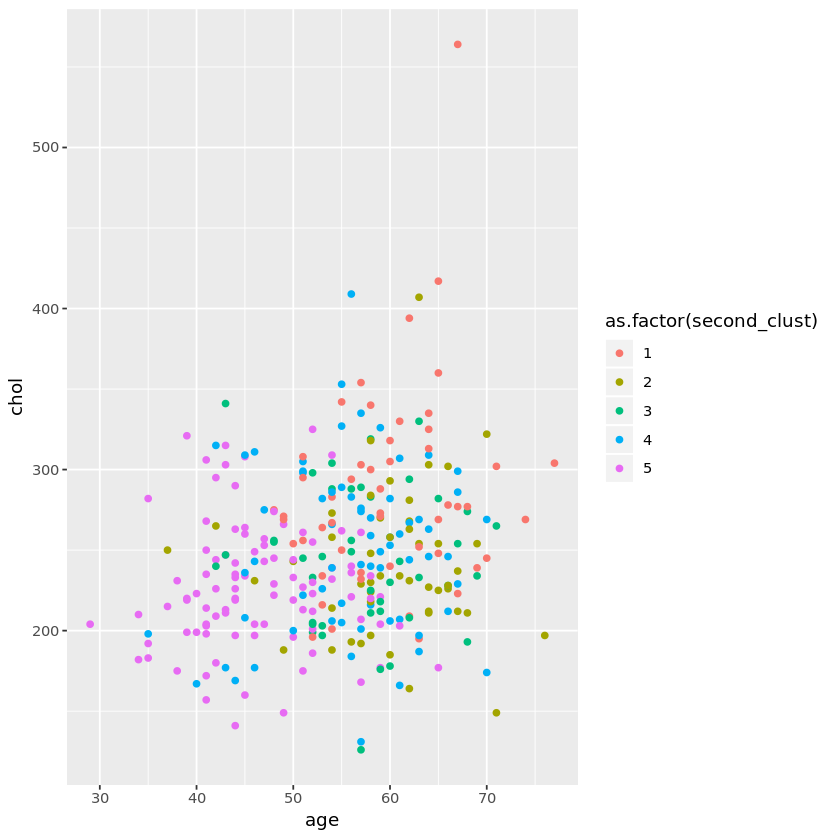

In [162]:
# Add cluster assignments to the data
heart_disease['first_clust'] <- first_clust$cluster
heart_disease['second_clust'] <- second_clust$cluster

# Load ggplot2
library('ggplot2')
# Create and print the plot of age and chol for the first clustering algorithm
plot_one  <- ggplot(heart_disease, aes(x=age,y=chol,color=as.factor(first_clust))) + 
      geom_point()  
plot_one 

# Create and print the plot of age and chol for the second clustering algorithm
plot_two  <- ggplot(heart_disease, aes(x=age,y=chol,color=as.factor(second_clust))) + 
      geom_point()  
plot_two 

## 6. Hierarchical clustering: another clustering approach
<p>An alternative to k-means clustering is hierarchical clustering. This method works well when data have a nested structure. Heart disease patient data might follow this type of structure. For example, if men are more likely to exhibit specific characteristics, those characteristics might be nested inside the gender variable. Hierarchical clustering also does not require the number of clusters to be selected before running the algorithm. </p>
<p>Clusters can be selected by using the dendrogram. The dendrogram allows us to see how similar observations are to one another, and they are useful in helping us choose the number of clusters to group the data. It is now time for us to see how hierarchical clustering groups the data. </p>

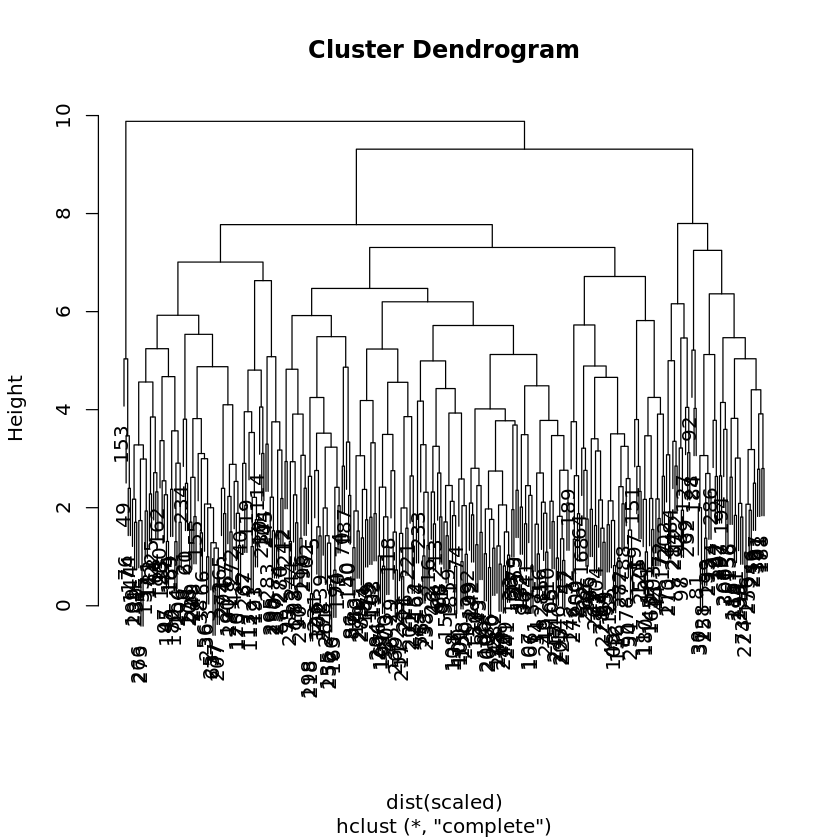

In [164]:
# Execute hierarchical clustering with complete linkage
hier_clust_1 <- hclust(dist(scaled), method = 'complete')

# Print the dendrogram
plot(hier_clust_1)
# Get cluster assignments based on number of selected clusters
hc_1_assign <- cutree(hier_clust_1,5)

## 7. Hierarchical clustering round two
<p>In hierarchical clustering, there are multiple ways to measure the dissimilarity between clusters of observations. Complete linkage records the largest dissimilarity between any two points in the two clusters being compared. On the other hand, single linkage is the smallest dissimilarity between any two points in the clusters. Different linkages will result in different clusters being formed. </p>
<p>We want to explore different algorithms to group our heart disease patients. The best way to measure dissimilarity between patients could be to look at the smallest difference between patients and minimize that difference when grouping together clusters. It is always a good idea to explore different dissimilarity measures. Let's implement hierarchical clustering using a new linkage function. </p>

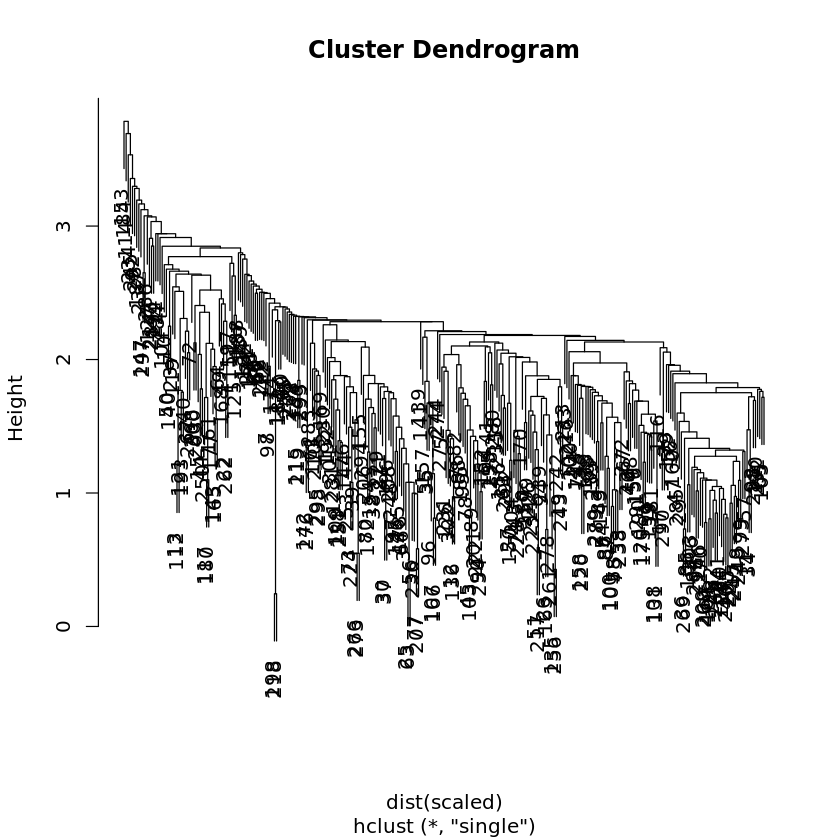

In [166]:
# Execute hierarchical clustering with single linkage
hier_clust_2 <- hclust(dist(scaled), method = 'single')

# Print the dendrogram
plot(hier_clust_2)
# Get cluster assignments based on number of selected clusters
hc_2_assign <- cutree(hier_clust_2,5)

## 8. Comparing clustering results
<p>The doctors are interested in grouping similar patients together to determine appropriate treatments. Therefore, they want clusters with more than a few patients to see different treatment options. While a patient can be in a cluster by themselves, this means that the treatment they received might not be recommended for someone else in the group. </p>
<p>Like the k-means algorithm, the way to evaluate hierarchical clusters is to investigate which patients are grouped together. Are there patterns evident in the cluster assignments, or do they seem to be groups of noise? We're going to examine the clusters resulting from the two hierarchical algorithms. </p>

In [168]:
# Add assignment of chosen hierarchical linkage
heart_disease['hc_clust']<-hc_1_assign
# Remove the sex, first_clust, and second_clust variables
hd_simple <- heart_disease[, !(names(heart_disease) %in% c("sex", "first_clust", "second_clust"))]

# Get the mean and standard deviation summary statistics
clust_summary <- do.call(data.frame, aggregate(. ~ hc_clust, data = hd_simple, function(x) c(avg = mean(x), sd = sd(x))))
clust_summary

hc_clust,age.avg,age.sd,cp.avg,cp.sd,trestbps.avg,trestbps.sd,chol.avg,chol.sd,fbs.avg,...,restecg.avg,restecg.sd,thalach.avg,thalach.sd,exang.avg,exang.sd,oldpeak.avg,oldpeak.sd,slope.avg,slope.sd
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,51.41667,8.540979,2.783333,0.9470625,129.1389,15.93800,239.8722,42.29228,0.1222222,...,0.8444444,0.9905826,161.5722,15.779214,0.07777778,0.2685686,0.555000,0.7847196,1.388889,0.5730336
2,58.11111,7.754246,3.763889,0.6165112,130.0417,13.90657,253.2222,49.74476,0.1805556,...,1.4027778,0.9140488,135.5417,17.991342,0.81944444,0.3873488,1.451389,1.0804268,1.750000,0.5240686
3,61.00000,3.908034,3.916667,0.2886751,168.5000,17.45904,284.9167,53.00336,0.3333333,...,1.2500000,0.9653073,147.7500,13.157266,0.75000000,0.4522670,2.316667,1.4708274,2.166667,0.5773503
4,59.00000,9.203580,3.571429,0.8501112,134.7714,18.64070,233.8571,49.67136,0.1428571,...,0.6857143,0.9321521,116.8857,17.842071,0.48571429,0.5070926,2.240000,1.3856831,2.200000,0.4058397
5,64.75000,2.061553,3.250000,0.5000000,138.7500,18.42779,433.7500,89.93470,0.2500000,...,2.0000000,0.0000000,156.2500,3.774917,0.00000000,0.0000000,1.100000,0.3829708,1.500000,0.5773503


## 9. Visualizing the cluster contents
<p>In addition to looking at the distributions of variables in each of the hierarchical clustering runs, we will make visualizations to evaluate the algorithms. Even though the data has more than two dimensions, we can get an idea of how the data clusters by looking at a scatter plot of two variables. We want to look for patterns that appear in the data and see what patients get clustered together. </p>

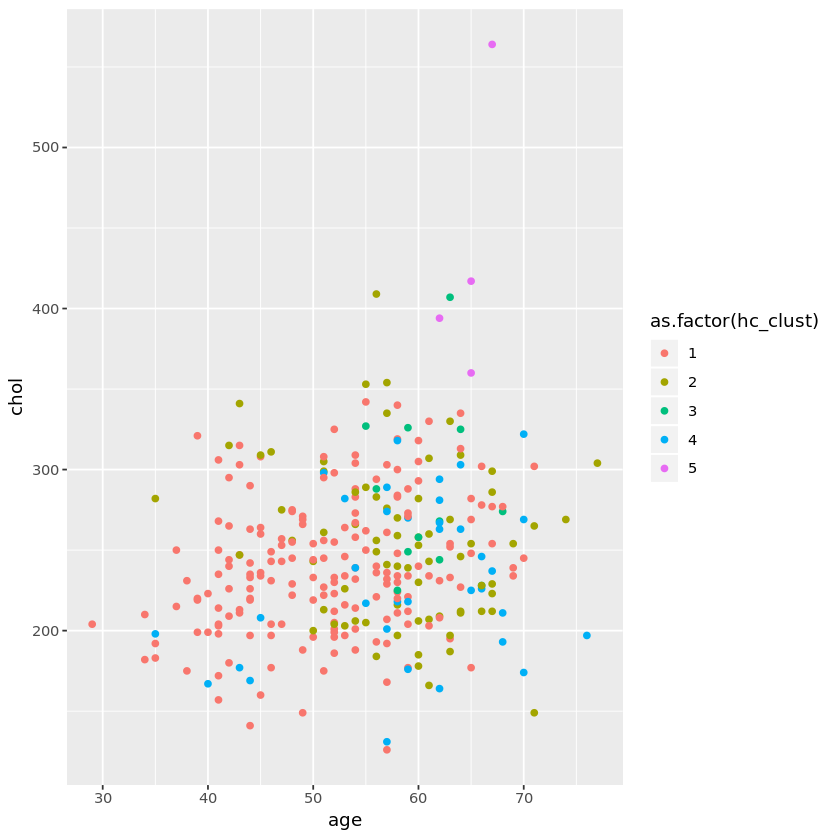

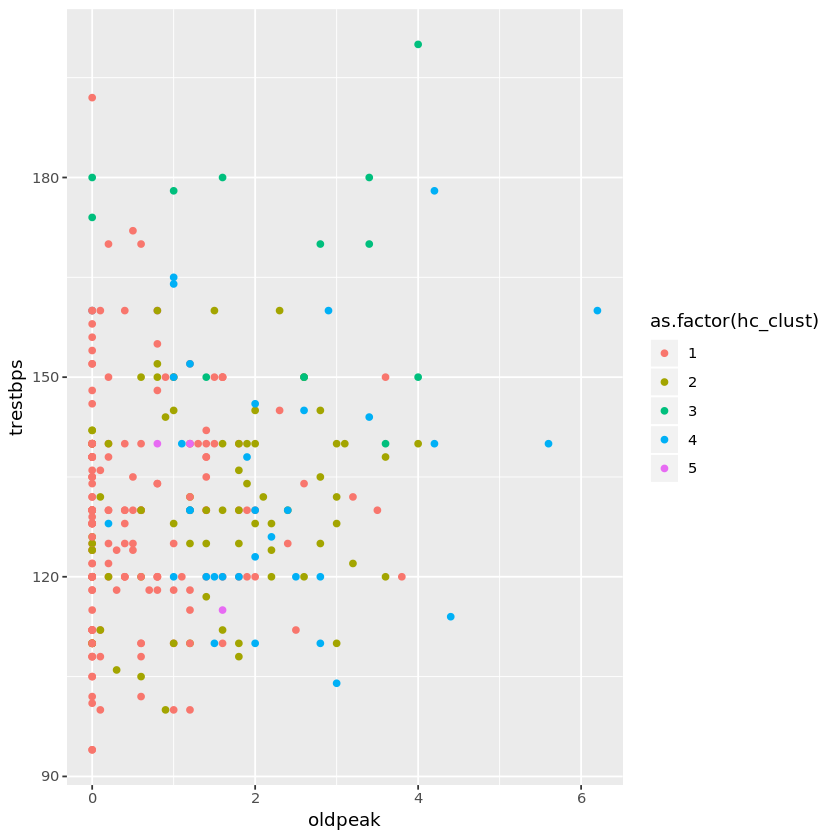

In [170]:
# Plot age and chol
plot_one<-ggplot(heart_disease,aes(x=age,y=chol,color=as.factor(hc_clust)))+
       geom_point()
plot_one
# Plot oldpeak and trestbps
plot_two<-ggplot(heart_disease,aes(x=oldpeak,y=trestbps,color=as.factor(hc_clust)))+
       geom_point()
plot_two

## 10. Conclusion
<p>Now that we've tried multiple clustering algorithms, it is necessary to determine if we think any of them will work for clustering our patients. For the k-means algorithm, similar clusters must be produced for each iteration of the algorithm to make sure that the algorithm clusters the signal, not the noise. </p>
<p>For the sake of the doctors, we also want to have multiple patients in each group so they can compare treatments. We only did some preliminary work to explore the performance of the algorithms, and it is necessary to explore further before making a recommendation. Based on the above analysis, are there any algorithms that you would want to investigate further to group patients? </p>
<p>Remember that it is important the k-mean algorithm seems stable when running multiple iterations. This means that we would see similar groups of patients showing up in the plots from the different iterations of the algorithm. For the hierarchical clustering, we need a method that puts a balanced number of patients in each group. </p>

In [172]:
# Add TRUE if the algorithm shows promise, add FALSE if it does not
explore_kmeans <- FALSE
explore_hierarch_complete <- TRUE
explore_hierarch_single <- FALSE